In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("Libraries imported successfully")


Libraries imported successfully


In [3]:
import os
os.listdir("data")


['walmart_sales.csv']

In [4]:
import pandas as pd

df = pd.read_csv("data/walmart_sales.csv")
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
df.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes


Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [7]:
df = df.sort_values('Date')


In [8]:
ts = df.groupby('Date')['Weekly_Sales'].sum()
ts.head()


Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

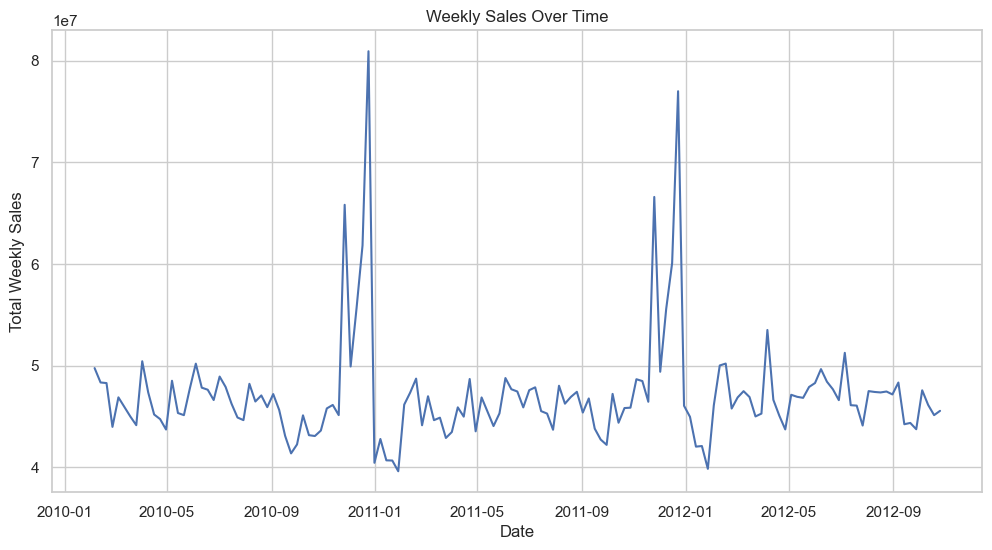

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()


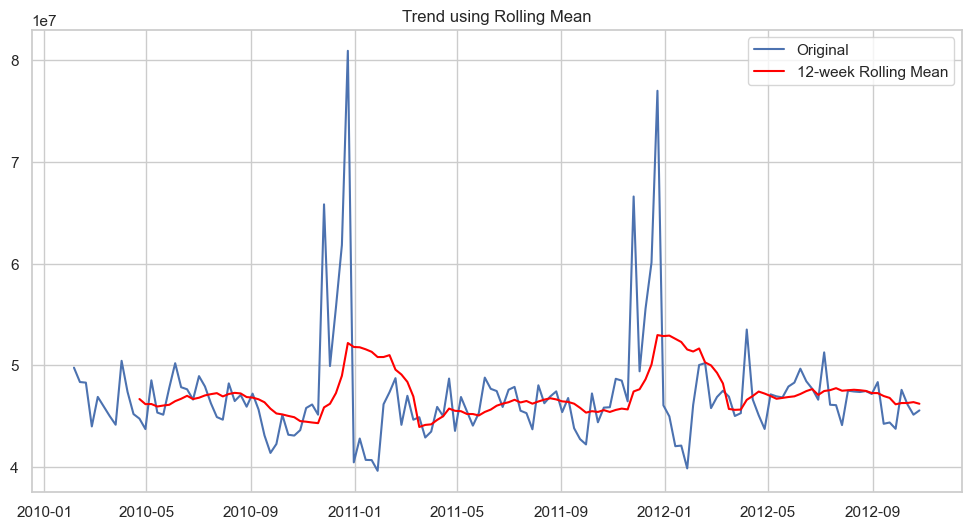

In [10]:
rolling_mean = ts.rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(ts, label="Original")
plt.plot(rolling_mean, label="12-week Rolling Mean", color="red")
plt.legend()
plt.title("Trend using Rolling Mean")
plt.show()


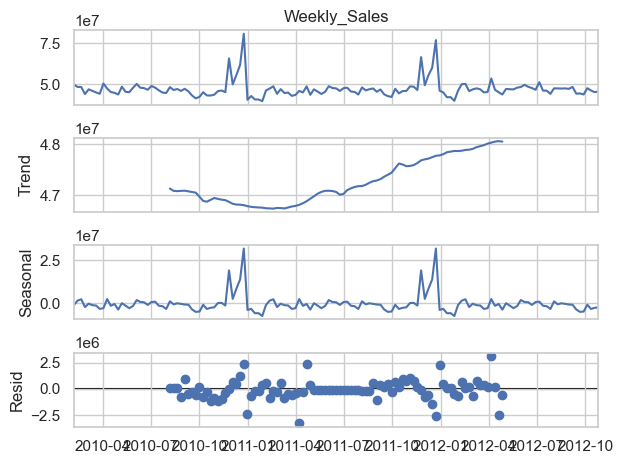

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, model='additive', period=52)
decomposition.plot()
plt.show()


In [12]:
train = ts[:-52]   
test = ts[-52:]    


In [13]:
print("Train size:", len(train))
print("Test size:", len(test))


Train size: 91
Test size: 52


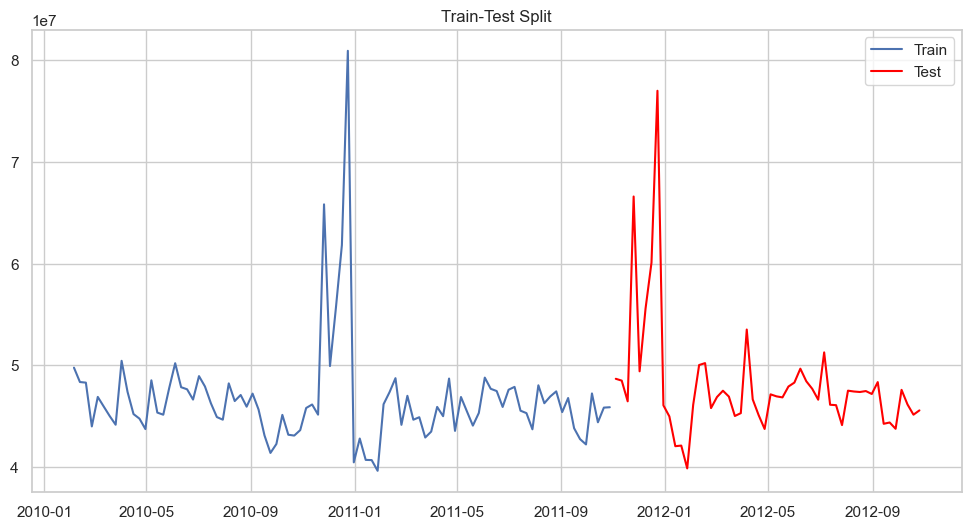

In [14]:
plt.figure(figsize=(12,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="red")
plt.legend()
plt.title("Train-Test Split")
plt.show()


In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -4.75886232828602
p-value: 6.514676331765525e-05


In [16]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,0,1))
model_fit = model.fit()

print(model_fit.summary())


C:\Users\ADITYA SATAPATHY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\ADITYA SATAPATHY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\ADITYA SATAPATHY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                   91
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1529.561
Date:                Sun, 04 Jan 2026   AIC                           3067.121
Time:                        23:06:36   BIC                           3077.164
Sample:                    02-05-2010   HQIC                          3071.173
                         - 10-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.658e+07   4.48e-08   1.04e+15      0.000    4.66e+07    4.66e+07
ar.L1          0.5523      0.239      2.315      0.021       0.085       1.020
ma.L1         -0.2557      0.295     -0.866      0.3

In [17]:
forecast = model_fit.forecast(steps=52)
forecast.head()


2011-11-04    4.626125e+07
2011-11-11    4.640427e+07
2011-11-18    4.648326e+07
2011-11-25    4.652689e+07
2011-12-02    4.655099e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64

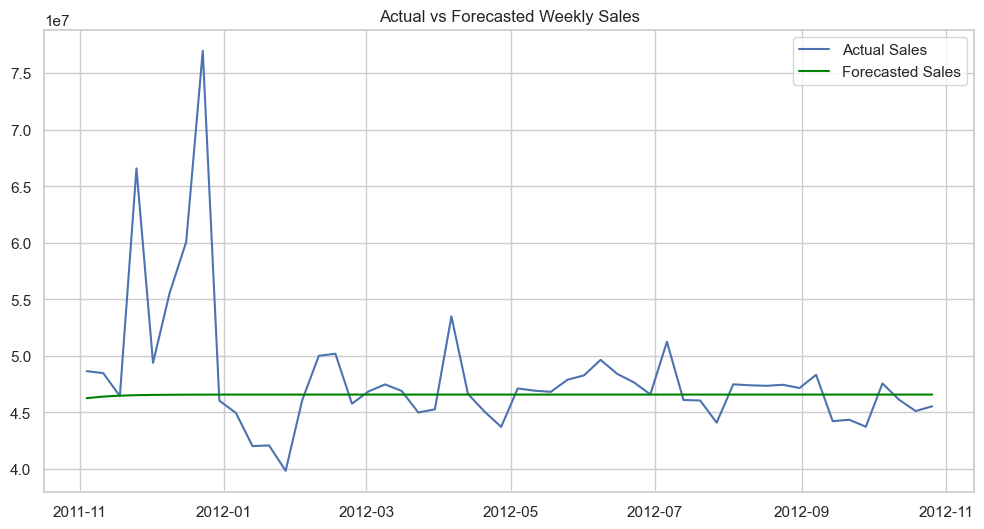

In [18]:
plt.figure(figsize=(12,6))
plt.plot(test, label="Actual Sales")
plt.plot(forecast, label="Forecasted Sales", color="green")
plt.legend()
plt.title("Actual vs Forecasted Weekly Sales")
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)


RMSE: 5989421.063596113


In [20]:
future_forecast = model_fit.forecast(steps=52)

import pandas as pd
last_date = ts.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=52, freq='W-FRI')

forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Weekly_Sales': future_forecast.values})
forecast_df.head()


,Date,Forecasted_Weekly_Sales
0,2012-11-02,4.626125e+07
1,2012-11-09,4.640427e+07
2,2012-11-16,4.648326e+07
3,2012-11-23,4.652689e+07
4,2012-11-30,4.655099e+07


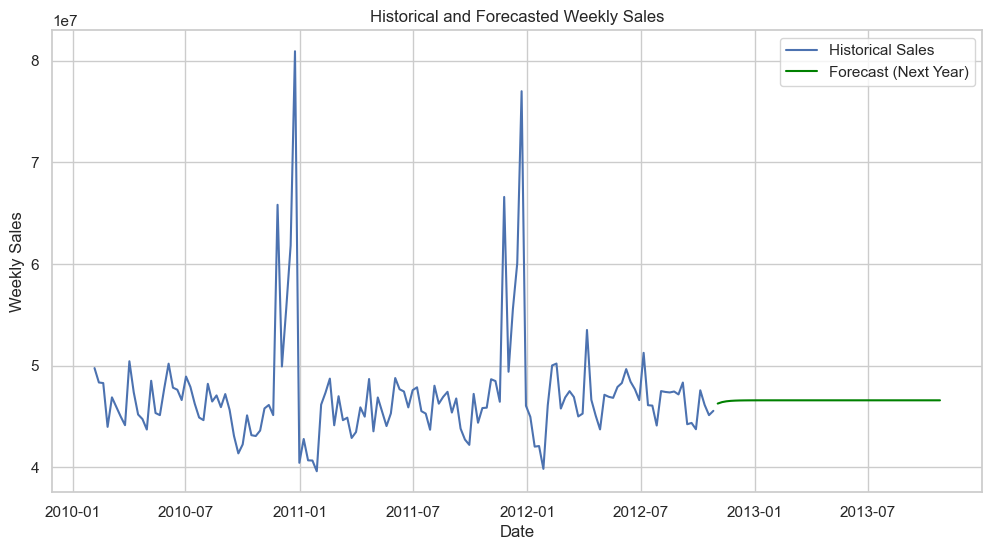

In [21]:
plt.figure(figsize=(12,6))
plt.plot(ts, label="Historical Sales")
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Weekly_Sales'], label="Forecast (Next Year)", color="green")
plt.legend()
plt.title("Historical and Forecasted Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


In [22]:
forecast_df.to_csv("data/future_forecast.csv", index=False)
print("Forecast saved as future_forecast.csv in data folder")


Forecast saved as future_forecast.csv in data folder
